In [1]:
#This notebook just contains tests for creating the visualization of the football pitch

In [74]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from matplotlib.patches import Arc
import plotly.graph_objects as go

# Do not truncate tables
pd.set_option('display.max_columns', None)

In [2]:
# Load the data

# Match data
df_match_data = pd.read_csv('../Data/FIFA World Cup 2022 Match Data/data.csv', delimiter=',')

# Player data
df_player_defense       = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_defense.csv', delimiter=',')
df_player_gca           = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_gca.csv', delimiter=',')
df_player_keepers       = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_keepers.csv', delimiter=',')
df_player_keepersadv    = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_keepersadv.csv', delimiter=',')
df_player_misc          = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_misc.csv', delimiter=',')
df_player_passing       = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_passing.csv', delimiter=',')
df_player_passing_types = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_passing_types.csv', delimiter=',')
df_player_playingtime   = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_playingtime.csv', delimiter=',')
df_player_possession    = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_possession.csv', delimiter=',')
df_player_shooting      = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_shooting.csv', delimiter=',')
df_player_stats         = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_stats.csv', delimiter=',')

# Team data
df_team_data        = pd.read_csv('../Data/FIFA World Cup 2022 Team Data/team_data.csv', delimiter=',')
df_team_group_stats = pd.read_csv('../Data/FIFA World Cup 2022 Team Data/group_stats.csv', delimiter=',')

# Historic data
df_historic_fifa_ranking      = pd.read_csv('../Data/FIFA World Cup Historic/fifa_ranking_2022-10-06.csv', delimiter=',')
df_historic_matches_1930_2022 = pd.read_csv('../Data/FIFA World Cup Historic/matches_1930_2022.csv', delimiter=',')
df_historic_world_cup         = pd.read_csv('../Data/FIFA World Cup Historic/world_cup.csv', delimiter=',')

# Penalty shootouts
df_penalty_shootouts = pd.read_csv('../Data/FIFA World Cup Penalty Shootouts/WorldCupShootouts.csv', delimiter=',')

# Twitter data
df_tweets_01 = pd.read_csv('../Data/FIFA World Cup 2022 Twitter Dataset/tweets1.csv', delimiter=';')
df_tweets_02 = pd.read_csv('../Data/FIFA World Cup 2022 Twitter Dataset/tweets2.csv', delimiter=';')
df_tweets = pd.concat([df_tweets_01, df_tweets_02])

# Prediction data
df_prediction_groups  = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/2022_world_cup_groups.csv', delimiter=',')
df_prediction_matches = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/2022_world_cup_matches.csv', delimiter=',')
df_prediction_international_matches = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/international_matches.csv', delimiter=',')
df_prediction_world_cup_matches = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/world_cup_matches.csv', delimiter=',')
df_prediction_world_cups = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/world_cups.csv', delimiter=',')

# Player images
def list_full_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory)]

def img_reshape(img):
    img = Image.open(img).convert('RGB')
    img = img.resize((300,300))
    img = np.asarray(img)
    return img

def showImages(group, land, player):
    images  = list_full_paths('../Data/FIFA World Cup 2022 Player Images/Images/Images/Group ' + group + '/' + land + ' Players/Images_' + player)
    img_arr = []
    
    for image in images:
        img_arr.append(img_reshape(image))
        
    rows = 2
    cols = 2
    img_count = 0
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=((2,2)))
                             
    for i in range(rows):
        for j in range(cols):
            if img_count < len(img_arr):
                axes[i,j].imshow(img_arr[img_count])
                axes[i,j].axis('off')
                img_count+=1
                
    plt.subplots_adjust(wspace=0, hspace=0)
    

In [57]:
df_match_data['home_formation'].unique()

array(['5-3-2', '4-2-3-1', '4-3-3', '4-4-2', '3-5-2', '3-4-3', '3-4-1-2',
       '4-1-2-1-2', '4-4-1-1', '5-4-1'], dtype=object)

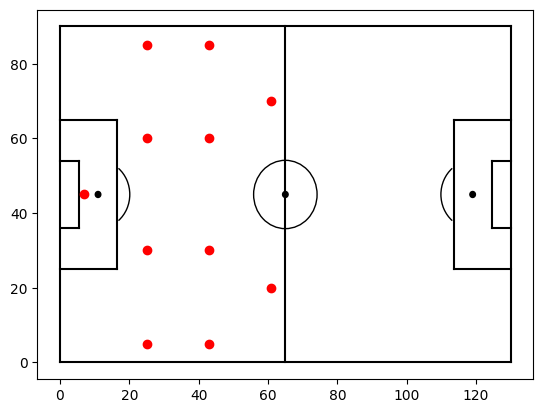

In [70]:
pitch = createPitch()


In [2]:
#Function which plots a 5-3-2 formation
def FiveThreeTwo():
    plt.plot(7,45, '-ro')
    plt.plot(25,45, '-ro')
    plt.plot(25,25, '-ro')
    plt.plot(25,5, '-ro')
    plt.plot(25,65, '-ro')
    plt.plot(25,85, '-ro')
    plt.plot(43,45, '-ro')
    plt.plot(43,15, '-ro')
    plt.plot(43,75, '-ro')
    plt.plot(61,20, '-ro')
    plt.plot(61,70, '-ro')

In [3]:
#Function which plots a 4-4-2 formation
def FourFourTwo():
    plt.plot(7,45, '-ro')
    plt.plot(25,30, '-ro')
    plt.plot(25,5, '-ro')
    plt.plot(25,60, '-ro')
    plt.plot(25,85, '-ro')   
    plt.plot(43,30, '-ro')
    plt.plot(43,5, '-ro')
    plt.plot(43,60, '-ro')
    plt.plot(43,85, '-ro')
    plt.plot(61,20, '-ro')
    plt.plot(61,70, '-ro')

In [23]:
def create_pitch(value, active_cell):
    fig2 = go.Figure()

    # Add pitch boundaries
    fig2.add_shape(type='rect', x0=0, y0=0, x1=130, y1=90, line=dict(color='black', width=2))

    # Add penalty areas
    fig2.add_shape(type='rect', x0=0, y0=25, x1=16.5, y1=65, line=dict(color='black', width=2))
    fig2.add_shape(type='rect', x0=113.5, y0=25, x1=130, y1=65, line=dict(color='black', width=2))

    # Add goal areas
    fig2.add_shape(type='rect', x0=0, y0=36, x1=5.5, y1=54, line=dict(color='black', width=2))
    fig2.add_shape(type='rect', x0=124.5, y0=36, x1=130, y1=54, line=dict(color='black', width=2))

    # Add centre circle
    fig2.add_shape(type='circle', x0=65-9.15, y0=45-9.15, x1=65+9.15, y1=45+9.15, line=dict(color='black', width=2))

    # Add centre spot
    fig2.add_trace(go.Scatter(x=[65], y=[45], mode='markers', marker=dict(color='black', size=5)))

    # Player positions for 5-3-2 formation (home team)
    five_three_two = [(7, 45), (25, 45), (25, 25), (25, 5), (25, 65), (25, 85),
                      (43, 45), (43, 15), (43, 75), (61, 20), (61, 70)]

    # Player positions for 4-3-3 formation (away team)
    four_three_three = [(130 - x, y) for x, y in [(7, 45), (25, 30), (25, 5), (25, 60), (25, 85), (43, 45), (43, 15), (43, 75), (61, 45), (61, 75), (61, 15)]]

    df_data = df_match_data_cleaned[df_match_data_cleaned["Stage"] == value][column]
    df_data = df_data.reset_index()
    if active_cell:
        if active_cell['row']< len(df_data):
            home_form = df_data.loc[active_cell['row'],'home_formation']
            away_form = df_data.loc[active_cell['row'],'away_formation']

            if home_form == '5-3-2':
                home_posistions = five_three_two
                # Add players for the home team
                for position in home_posistions:
                    fig2.add_trace(go.Scatter(x=[position[0]], y=[position[1]], mode='markers', marker=dict(color='red', size=10)))

            if away_form == '4-3-3':
                away_positions = four_three_three
                # Add players for the away team
                for position in away_positions:
                    fig2.add_trace(go.Scatter(x=[position[0]], y=[position[1]], mode='markers', marker=dict(color='blue', size=10)))


    

    # Update layout
    fig2.update_layout(
        xaxis=dict(range=[0, 130], visible=False),
        yaxis=dict(range=[0, 90], visible=False),
        plot_bgcolor='green',  # Change pitch color if needed
        showlegend=False
    )

    return fig2

In [16]:
def FourFourTwo():
    fig = go.Figure()

    # Player positions
    player_positions = [
        (7, 45), (25, 30), (25, 5), (25, 60), (25, 85),
        (43, 30), (43, 5), (43, 60), (43, 85),
        (61, 20), (61, 70)
    ]

    for position in player_positions:
        fig.add_trace(go.Scatter(x=[position[0]], y=[position[1]], mode='markers', marker=dict(color='red', size=10)))

home_442 = [
        (7, 45), (25, 30), (25, 5), (25, 60), (25, 85),
        (43, 30), (43, 5), (43, 60), (43, 85),
        (61, 20), (61, 70)
    ]

away_442 = [(130 - x, y) for x, y in [
        (7, 45), (25, 30), (25, 5), (25, 60), (25, 85),
        (43, 30), (43, 5), (43, 60), (43, 85),
        (61, 20), (61, 70)
    ]]

In [17]:
def ThreeFiveTwo():
    fig = go.Figure()

    # Player positions
    player_positions = [
        (7, 45), (25, 45), (25, 25), (25, 5), (25, 65), (25, 85),
        (43, 45), (43, 15), (43, 75),
        (61, 20), (61, 70)
    ]

    for position in player_positions:
        fig.add_trace(go.Scatter(x=[position[0]], y=[position[1]], mode='markers', marker=dict(color='red', size=10)))

home_352 = [
        (7, 45), (25, 45), (25, 25), (25, 5), (25, 65), (25, 85),
        (43, 45), (43, 15), (43, 75),
        (61, 20), (61, 70)
    ]

away_352 = [(130 - x, y) for x, y in [
        (7, 45), (25, 45), (25, 25), (25, 5), (25, 65), (25, 85),
        (43, 45), (43, 15), (43, 75),
        (61, 20), (61, 70)
    ]]

In [18]:
#Function which plots a 4-3-3 formation
def FourThreeThree():
    plt.plot(7,45, '-ro')
    plt.plot(25,30, '-ro')
    plt.plot(25,5, '-ro')
    plt.plot(25,60, '-ro')
    plt.plot(25,85, '-ro')
    plt.plot(43,45, '-ro')
    plt.plot(43,15, '-ro')
    plt.plot(43,75, '-ro')
    plt.plot(61,45, '-ro')
    plt.plot(61,75, '-ro')
    plt.plot(61,15, '-ro')

In [19]:
def FourTwoThreeOne():
    fig = go.Figure()

    # Player positions
    player_positions = [
        (7, 45), (25, 30), (25, 5), (25, 60), (25, 85),
        (43, 45), (43, 15),
        (61, 20), (61, 45), (61, 75),
        (79, 45)
    ]

    for position in player_positions:
        fig.add_trace(go.Scatter(x=[position[0]], y=[position[1]], mode='markers', marker=dict(color='red', size=10)))

home_4231 = [
        (7, 45), (25, 30), (25, 5), (25, 60), (25, 85),
        (43, 45), (43, 15),
        (61, 20), (61, 45), (61, 75),
        (79, 45)
    ]

away_4231 =  [(130 - x, y) for x, y in [
        (7, 45), (25, 30), (25, 5), (25, 60), (25, 85),
        (43, 45), (43, 15),
        (61, 20), (61, 45), (61, 75),
        (79, 45)
    ]]

In [20]:
def ThreeFiveTwo():
    fig = go.Figure()

    # Player positions
    player_positions = [
        (7, 45), (25, 45), (25, 25), (25, 5), (25, 65), (25, 85),
        (43, 45), (43, 15), (43, 75),
        (61, 20), (61, 70)
    ]

    for position in player_positions:
        fig.add_trace(go.Scatter(x=[position[0]], y=[position[1]], mode='markers', marker=dict(color='red', size=10)))

home_352 = [
        (7, 45), (25, 45), (25, 25), (25, 5), (25, 65), (25, 85),
        (43, 45), (43, 15), (43, 75),
        (61, 20), (61, 70)
    ]

away_352 = [(130 - x, y) for x, y in [
        (7, 45), (25, 45), (25, 25), (25, 5), (25, 65), (25, 85),
        (43, 45), (43, 15), (43, 75),
        (61, 20), (61, 70)
    ]]

In [21]:
def ThreeFourThree():
    fig = go.Figure()

    # Player positions
    player_positions = [
        (7, 45), (25, 30), (25, 45), (25, 60), (43, 15), (43, 45),
        (43, 75), (61, 20), (61, 45), (61, 70)
    ]

    for position in player_positions:
        fig.add_trace(go.Scatter(x=[position[0]], y=[position[1]], mode='markers', marker=dict(color='red', size=10)))

home_343 = [
        (7, 45), (25, 30), (25, 45), (25, 60), (43, 15), (43, 45),
        (43, 75), (61, 20), (61, 45), (61, 70)
    ]

away_343 = [(130 - x, y) for x, y in [
        (7, 45), (25, 30), (25, 45), (25, 60), (43, 15), (43, 45),
        (43, 75), (61, 20), (61, 45), (61, 70)
    ]]

In [22]:
def ThreeFourOneTwo():
    fig = go.Figure()

    # Player positions
    player_positions = [
        (7, 45), (25, 30), (25, 45), (25, 60), (43, 15), (43, 45),
        (43, 75), (61, 45), (61, 70)
    ]

    for position in player_positions:
        fig.add_trace(go.Scatter(x=[position[0]], y=[position[1]], mode='markers', marker=dict(color='red', size=10)))

home_3412  =[
        (7, 45), (25, 30), (25, 45), (25, 60), (43, 15), (43, 45),
        (43, 75), (61, 45), (61, 70)
    ]

away_3412 = [(130 - x, y) for x, y in [
        (7, 45), (25, 30), (25, 45), (25, 60), (43, 15), (43, 45),
        (43, 75), (61, 45), (61, 70)
    ]]


In [13]:
def FourOneTwoOneTwo():
    fig = go.Figure()

    # Player positions
    player_positions = [
        (7, 45), (25, 30), (25, 45), (25, 60), (43, 15), (43, 75),
        (61, 20), (61, 45), (61, 70)
    ]

    for position in player_positions:
        fig.add_trace(go.Scatter(x=[position[0]], y=[position[1]], mode='markers', marker=dict(color='red', size=10)))

home_41212 = [
        (7, 45), (25, 30), (25, 45), (25, 60), (43, 15), (43, 75),
        (61, 20), (61, 45), (61, 70)
    ]

away_41212 = [(130 - x, y) for x, y in [
        (7, 45), (25, 30), (25, 45), (25, 60), (43, 15), (43, 75),
        (61, 20), (61, 45), (61, 70)
    ]]

In [24]:
def FiveFourOne():
    fig = go.Figure()

    # Player positions
    player_positions = [
        (7, 45), (25, 30), (25, 45), (25, 60), (25, 75),
        (43, 30), (43, 15), (43, 45), (43, 60), (43, 75),
        (61, 45)
    ]

    for position in player_positions:
        fig.add_trace(go.Scatter(x=[position[0]], y=[position[1]], mode='markers', marker=dict(color='red', size=10)))

home_542 = [
        (7, 45), (25, 30), (25, 45), (25, 60), (25, 75),
        (43, 30), (43, 15), (43, 45), (43, 60), (43, 75),
        (61, 45)
    ]

away_542 = [(130 - x, y) for x, y in [
        (7, 45), (25, 30), (25, 45), (25, 60), (25, 75),
        (43, 30), (43, 15), (43, 45), (43, 60), (43, 75),
        (61, 45)
    ]]

In [ ]:
def FourFourOneOne():
    fig = go.Figure()

    # Player positions
    player_positions = [
        (7, 45), (25, 30), (25, 45), (25, 60), (25, 75),
        (43, 30), (43, 5), (43, 60), (43, 85),
        (61, 45), (61, 75)
    ]

    for position in player_positions:
        fig.add_trace(go.Scatter(x=[position[0]], y=[position[1]], mode='markers', marker=dict(color='red', size=10)))

home_4411 = [
        (7, 45), (25, 30), (25, 45), (25, 60), (25, 75),
        (43, 30), (43, 5), (43, 60), (43, 85),
        (61, 45), (61, 75)
    ]

away_4411 = [(130 - x, y) for x, y in [
        (7, 45), (25, 30), (25, 45), (25, 60), (25, 75),
        (43, 30), (43, 5), (43, 60), (43, 85),
        (61, 45), (61, 75)
    ]]

In [5]:
#Function which creates a football field visualization using plt.plot figures
def createPitch():
    
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="black")
    plt.plot([0,130],[90,90], color="black")
    plt.plot([130,130],[90,0], color="black")
    plt.plot([130,0],[0,0], color="black")
    plt.plot([65,65],[0,90], color="black")
    
    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color="black")
    plt.plot([0,16.5],[65,65],color="black")
    plt.plot([16.5,0],[25,25],color="black")
    
    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color="black")
    plt.plot([113.5,113.5],[65,25],color="black")
    plt.plot([113.5,130],[25,25],color="black")
    
    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color="black")
    plt.plot([5.5,5.5],[54,36],color="black")
    plt.plot([5.5,0.5],[36,36],color="black")
    
    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color="black")
    plt.plot([124.5,124.5],[54,36],color="black")
    plt.plot([124.5,130],[36,36],color="black")
    FourFourTwo()
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
    centreSpot = plt.Circle((65,45),0.8,color="black")
    leftPenSpot = plt.Circle((11,45),0.8,color="black")
    rightPenSpot = plt.Circle((119,45),0.8,color="black")
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    #plt.axis('off')
    
    #Display Pitch
    plt.show()
    

In [84]:
import plotly.graph_objects as go
import plotly.io as pio

def create_pitch():
    fig = go.Figure()

    # Add pitch boundaries
    fig.add_shape(type='rect', x0=0, y0=0, x1=130, y1=90, line=dict(color='black', width=2))

    # Add penalty areas
    fig.add_shape(type='rect', x0=0, y0=25, x1=16.5, y1=65, line=dict(color='black', width=2))
    fig.add_shape(type='rect', x0=113.5, y0=25, x1=130, y1=65, line=dict(color='black', width=2))

    # Add goal areas
    fig.add_shape(type='rect', x0=0, y0=36, x1=5.5, y1=54, line=dict(color='black', width=2))
    fig.add_shape(type='rect', x0=124.5, y0=36, x1=130, y1=54, line=dict(color='black', width=2))

    # Add centre circle
    fig.add_shape(type='circle', x0=65-9.15, y0=45-9.15, x1=65+9.15, y1=45+9.15, line=dict(color='black', width=2))

    # Add centre spot
    fig.add_trace(go.Scatter(x=[65], y=[45], mode='markers', marker=dict(color='black', size=5)))

    # Update layout
    fig.update_layout(
        xaxis=dict(range=[0, 130], visible=False),
        yaxis=dict(range=[0, 90], visible=False),
        plot_bgcolor='green',  # Change pitch color if needed
        showlegend=False
    )

    return fig

# Save the plot as an HTML file (optional)
plot = create_pitch()
pio.write_html(plot, file='football_pitch.html', auto_open=True)


In [83]:
CreatePitch()